In [39]:
%run util.ipynb
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [48]:
class perceptron():
    
    # eta is the learning rate and n_iter is the number of epochs
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        N, D = X.shape
        
        # create list of errors
        # create weight array including additional slot for bias
        self.errors = []
        self.w = np.zeros(D + 1)
        
        # iterate through epochs
        for i in range(self.n_iter):
            error = 0 # initially 0 at the beginning of each iteration
            
            # use perceptron rule and update weights
            for xi, target in list(zip(X,Y)):
                update = self.eta * (target - self.predict(xi))
                self.w[0] +=  update
                self.w[1:] += update * xi
                error += int(update != 0) # keeps track of # of errors
            self.errors.append(error)
        # plot results each epoch
        plt.plot(self.errors)
        
    # return +1 or -1 depending on whether Xw + w0 is positive or not
    def predict(self, X):
        return np.sign(X.dot(self.w[1:]) + self.w[0])
    
    def score(self,X,Y):
        P = self.predict(X)
        return np.mean(P == Y)  

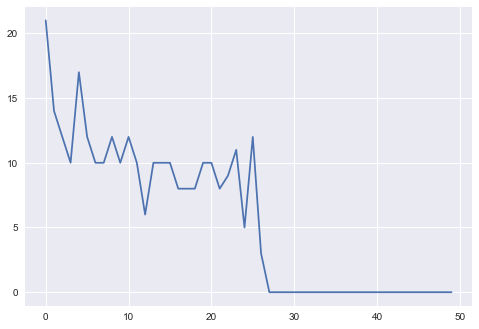

In [76]:
# generating a test data set

def get_data_separable():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300,2))*2 -1
    Y = np.sign(X.dot(w) + b)
    return X, Y


if __name__ == '__main__':
    X, Y = get_data_separable()
       
    Ntrain = int(len(Y) / 2)
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = perceptron(eta=0.01, n_iter=50)
    model.fit(Xtrain,Ytrain)

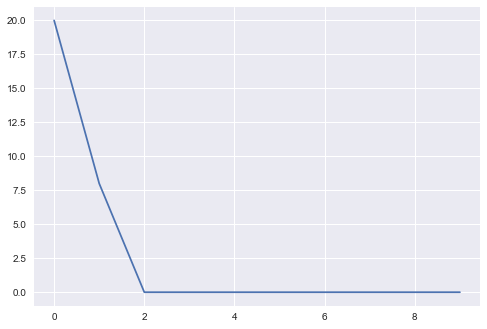

In [79]:
# using the mnist data set

if __name__ == '__main__':
    X, Y = get_data()
    
    idx = np.logical_or(Y == 0, Y ==1) # returns true where Y = 0 or 1
    
    # keep indexes where idx is true
    X = X[idx] 
    Y = Y[idx]
    
    # remember perceptron is binary between -1 and 1
    Y[Y==0] = -1
    
    Ntrain = int(len(Y) / 2)
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = perceptron(0.01, 50)
    model.fit(Xtrain,Ytrain)

In [80]:
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Test accuracy:", model.score(Xtest, Ytest))

Train accuracy: 1.0
Test accuracy: 0.998185117967
